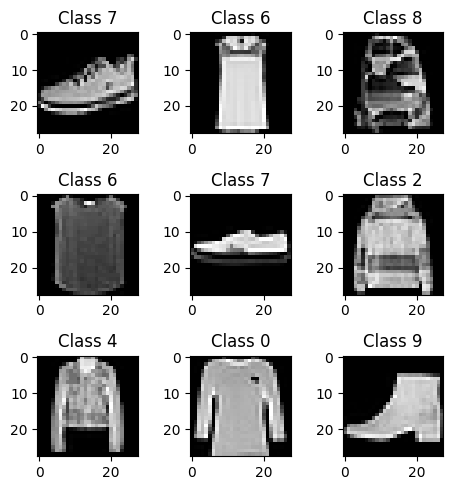

Epoch 1/15
422/422 [==============================] - 12s 29ms/step - loss: 0.5538 - accuracy: 0.7974 - val_loss: 0.3646 - val_accuracy: 0.8620
Epoch 2/15
422/422 [==============================] - 15s 36ms/step - loss: 0.3704 - accuracy: 0.8647 - val_loss: 0.3094 - val_accuracy: 0.8865
Epoch 3/15
422/422 [==============================] - 15s 36ms/step - loss: 0.3268 - accuracy: 0.8794 - val_loss: 0.2861 - val_accuracy: 0.8957
Epoch 4/15
422/422 [==============================] - 15s 36ms/step - loss: 0.2966 - accuracy: 0.8887 - val_loss: 0.2632 - val_accuracy: 0.9013
Epoch 5/15
422/422 [==============================] - 14s 34ms/step - loss: 0.2801 - accuracy: 0.8960 - val_loss: 0.2580 - val_accuracy: 0.9012
Epoch 6/15
422/422 [==============================] - 14s 33ms/step - loss: 0.2611 - accuracy: 0.9017 - val_loss: 0.2508 - val_accuracy: 0.9095
Epoch 7/15
422/422 [==============================] - 14s 34ms/step - loss: 0.2518 - accuracy: 0.9057 - val_loss: 0.2517 - val_accuracy:

/Users/oscarpatrikminj/Documents/IITR/FMNIST/venv/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
# Step 1: Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy import random
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam

# Step 2: Load and visualize data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Show 9 random training samples
plt.rcParams['figure.figsize'] = (5,5)
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f'Class {y_train[num]}')
    plt.tight_layout()
plt.show()

# Step 3: Preprocess data
num_classes = 10
X_train = X_train.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Step 4: Build CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(100, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
opt = Adam(learning_rate=0.002)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, batch_size=128, epochs=15, validation_split=0.1)

# Step 6: Evaluate on test data
score = model.evaluate(X_test, y_test)
print('Test accuracy:', score[1])

# -- Add these lines here before saving --

# Print total parameters and memory usage estimate
total_params = model.count_params()
bytes_per_param = 4  # float32 uses 4 bytes
total_memory_bytes = total_params * bytes_per_param
total_memory_mb = total_memory_bytes / (1024**2)

print(f"Total parameters: {total_params}")
print(f"Approx RAM needed for model weights: {total_memory_mb:.2f} MB")

# -- Now save model and weights --

model.save('baseline_model.h5')
model.save_weights('baseline_weights.h5')

In [4]:
converter = tf.lite.TFLiteConverter.from_keras_model(baseline_model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /var/folders/bs/x0lj933d1hv0py0d4w2ypdp40000gn/T/tmptbve0yh2/assets


INFO:tensorflow:Assets written to: /var/folders/bs/x0lj933d1hv0py0d4w2ypdp40000gn/T/tmptbve0yh2/assets
2025-06-05 20:56:17.639920: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2025-06-05 20:56:17.640070: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2025-06-05 20:56:17.641893: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /var/folders/bs/x0lj933d1hv0py0d4w2ypdp40000gn/T/tmptbve0yh2
2025-06-05 20:56:17.643119: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2025-06-05 20:56:17.643127: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /var/folders/bs/x0lj933d1hv0py0d4w2ypdp40000gn/T/tmptbve0yh2
2025-06-05 20:56:17.646177: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2025-06-05 20:56:17.647856: I tensorflow/cc/saved_model/load

In [5]:
import pathlib
tflite_models_dir = pathlib.Path('/Users/oscarpatrikminj/Documents/IITR/FMNIST/tflite_models')
tflite_models_dir.mkdir(exist_ok=True, parents=True)
tflite_model_file = tflite_models_dir/'model.tflite'
tflite_model_file.write_bytes(tflite_model)

723104

In [7]:
import os

tflite_model_file = 'tflite_models/model.tflite'
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()
input_index = interpreter.get_input_details()[0]['index']
output_index = interpreter.get_output_details()[0]['index']


pred_list = []
# Step 7: Make predictions using the TFLite model
# Iterate over test images and make predictions
for images in X_test:
    input_data = np.array(images, dtype=np.float32)
    input_data = input_data.reshape(1, input_data.shape[0], input_data.
    shape[1], 1)
    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()
    prediction = interpreter.get_tensor(output_index)
    prediction = np.argmax(prediction)
    pred_list.append(prediction)

accurate_count = 0
for index in range(len(pred_list)):
    if pred_list[index] == np.argmax(y_test[index]):
        accurate_count += 1

accuracy = accurate_count * 1.0 / len(pred_list)
print('accuracy = ', accuracy)

# File size
model_size_kb = os.path.getsize(tflite_model_file) / 1024
print(f" Uncompressed model size: {model_size_kb:.2f} KB")

accuracy =  0.914
 Uncompressed model size: 706.16 KB
